# ANOMALY DETECTION

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## GENERATE SAMPLE DAYA FOR TESTING

In [5]:
def generate_sensor_data(n=1000, seed=42):
    np.random.seed(seed)
    time = pd.date_range("2023-01-01", periods=n, freq="H")
    temp = 25 + np.random.normal(0, 1, n)  # normal baseline

    # Inject anomalies
    temp[100:110] += 15   # spike
    temp[500:505] -= 10   # sudden drop
    temp[700:710] = 30    # flatline

    df = pd.DataFrame({"time": time, "temperature": temp})
    return df

## FEATURE ENGINEERING

In [6]:
def add_features(df):
    df["rolling_mean"] = df["temperature"].rolling(window=10, min_periods=1).mean()
    df["rolling_std"] = df["temperature"].rolling(window=10, min_periods=1).std().fillna(0)
    df["z_score"] = (df["temperature"] - df["rolling_mean"]) / (df["rolling_std"] + 1e-5)
    return df

## MODEL TRAINING

In [9]:
from sklearn.ensemble import IsolationForest

def train_iforest(df, contamination=0.02):
    model = IsolationForest(contamination=contamination, random_state=42)
    df["anomaly"] = model.fit_predict(df[["temperature", "rolling_mean", "rolling_std", "z_score"]])
    return df, model

In [10]:
df = generate_sensor_data()

In [11]:
df = add_features(df)

In [12]:
df, model = train_iforest(df)

C:\Users\mpatle\AppData\Local\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [13]:
anomalies = df[df["anomaly"] == -1]

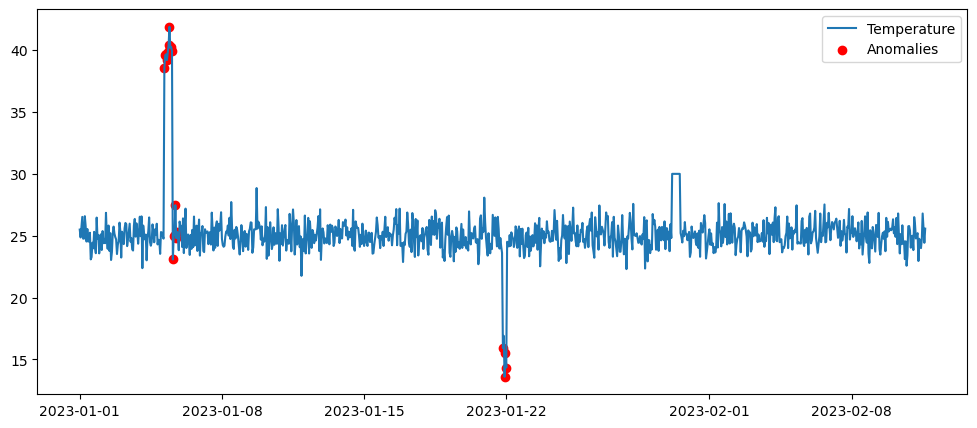

In [14]:
plt.figure(figsize=(12,5))
plt.plot(df["time"], df["temperature"], label="Temperature")
plt.scatter(anomalies["time"], anomalies["temperature"], color="red", label="Anomalies")
plt.legend()
plt.show()